<a href="https://colab.research.google.com/github/lfmuneramm/Aprendizaje_No_Supervisado/blob/main/Parcial_LFM_Prospectiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caso de Estudio**

El dataset de Heart Attack Prediction contiene información de personas en distintos países del mundo, incluyendo Colombia. Cada registro representa a un individuo con características clínicas y de estilo de vida, cuyo objetivo es analizar los factores que influyen en el riesgo de ataque cardíaco.

Entre las variables clínicas destacan la edad, el colesterol, la frecuencia cardíaca, el índice de masa corporal (BMI) y los triglicéridos, todas ellas relacionadas directamente con la probabilidad de desarrollar problemas cardíacos.

En cuanto a hábitos de vida, se incluyen las horas de ejercicio diario y las horas de sueño por día, que son factores protectores o de riesgo según el nivel registrado. También aparece el ingreso, que aunque no es un indicador clínico, influye en el acceso a salud y hábitos saludables.

La variable de salida es el riesgo de ataque cardíaco (Heart Attack Risk), que puede estar expresada como binaria (1/0) o como probabilidad. En el caso de estudio, Colombia se toma como país de referencia y se busca identificar qué variable se relaciona más con este riesgo, comparar la similitud de Colombia con otros países usando la teoría de la credibilidad, integrar los datos con el método de aceptación y rechazo, y finalmente evaluar cómo cambia la estadística descriptiva y la confiabilidad tras la integración.

#**Descripción de las variables**

La variable Age representa la edad de cada persona en años. Es un factor de riesgo clave, ya que la probabilidad de un ataque cardíaco suele aumentar a medida que la persona envejece.

La variable Cholesterol mide el nivel de colesterol en la sangre. Valores altos están asociados a la acumulación de grasa en las arterias, lo que incrementa la posibilidad de problemas cardíacos.

La Heart Rate corresponde a la frecuencia cardíaca, es decir, la cantidad de latidos por minuto. Tanto valores demasiado bajos como muy altos pueden ser señales de riesgo cardiovascular.

La variable Exercise Hour indica las horas de ejercicio que una persona realiza diariamente. Un mayor nivel de actividad física se relaciona con un corazón más saludable y menor riesgo de infarto.

El Income hace referencia al nivel de ingresos del individuo. Aunque no es una medida médica, puede influir en el estilo de vida, el acceso a atención en salud y la alimentación.

El BMI (Body Mass Index) es el índice de masa corporal, calculado a partir del peso y la altura. Permite identificar sobrepeso u obesidad, que son factores de riesgo para enfermedades cardiovasculares.

La variable Triglycerides muestra el nivel de triglicéridos en sangre, un tipo de grasa que, en exceso, aumenta las probabilidades de sufrir aterosclerosis y ataques cardíacos.

Las Sleep Hours per Day corresponden al número de horas de sueño diarias. Tanto dormir poco como dormir en exceso se relaciona con un mayor riesgo de problemas cardíacos.

Finalmente, la variable Heart Attack Risk es la variable de salida o de pronóstico. Indica si la persona presenta un alto riesgo de ataque cardíaco. Generalmente se presenta como un valor binario (0 = no, 1 = sí).

0. Importamos las librerias necesarias

In [22]:
# Paso 1: Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, stats


1. Cargamos la base de datos y visualizamos información sobre ella.

In [23]:
# Reemplaza con el nombre exacto de tu archivo CSV
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

#Miramos si tiene datos nulos
print(df.isnull().sum())

print("")

#Miramos información general
print("\nInformación general:")
print(df.info())



Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Información general:
<c

2. Separamos los continentes y ubicamos solo America, dividida en norte y sur.

In [24]:
# Solo Colombia y países de Norte y Sur América. Porque así lo haremos para efectos del ejercicio
df_america = df[df['Continent'].isin(['North America', 'South America'])]
df_colombia = df[df['Country'] == 'Colombia']

# Verificar que estén bien los datos
print("Datos América:", df_america.shape)
print("Datos Colombia:", df_colombia.shape)

Datos América: (2222, 26)
Datos Colombia: (429, 26)


3. Usamos solo las variables númericas del dataset, para luego encontrar la correlación con la variable objetivo.

In [25]:
# Variables numéricas del dataset
variables = [
    "Age",
    "Cholesterol",
    "Heart Rate",
    "Exercise Hours Per Week",
    "Income",
    "BMI",
    "Triglycerides",
    "Sleep Hours Per Day"
]

# Variable de pronóstico (target)
target = "Heart Attack Risk"

# Revisión de tipos de datos
df[variables + [target]].dtypes

,0
Age,int64
Cholesterol,int64
Heart Rate,int64
Exercise Hours Per Week,float64
Income,int64
BMI,float64
Triglycerides,int64
Sleep Hours Per Day,int64
Heart Attack Risk,int64


4. Miramos la distribución o el comportamiento de las variables númericas de la base de datos

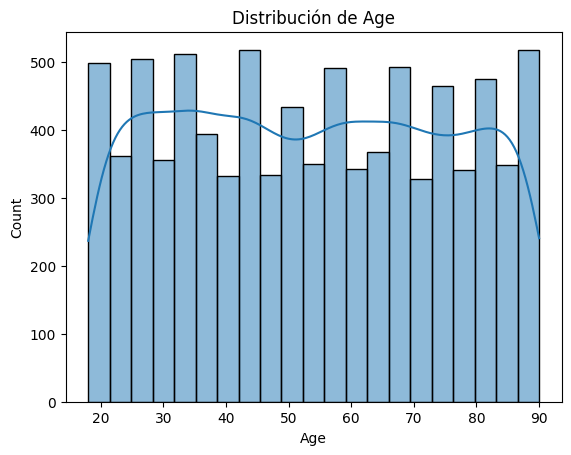

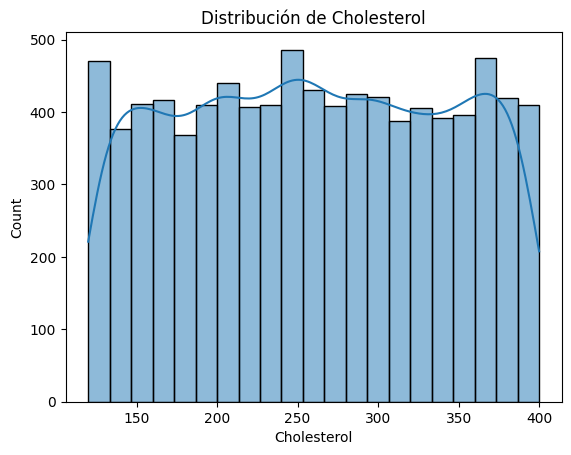

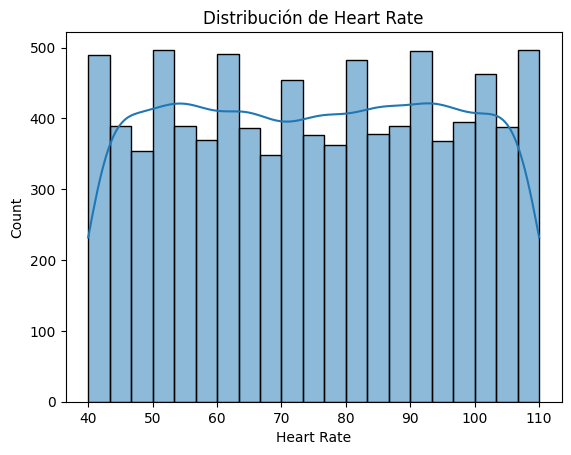

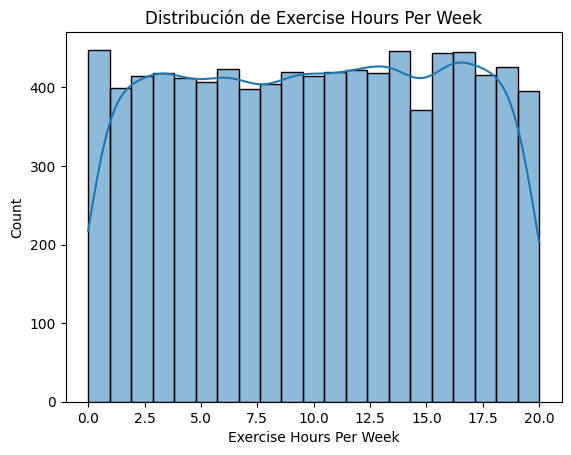

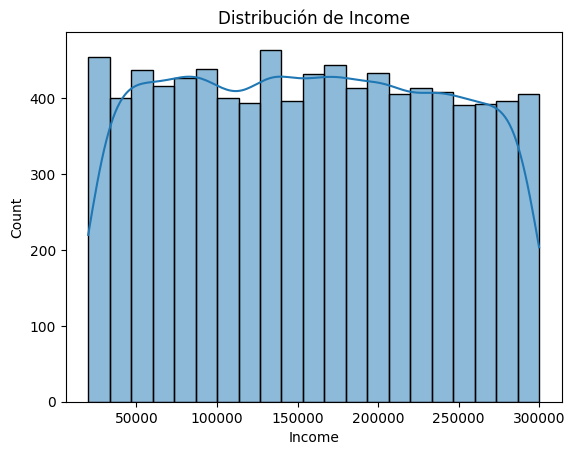

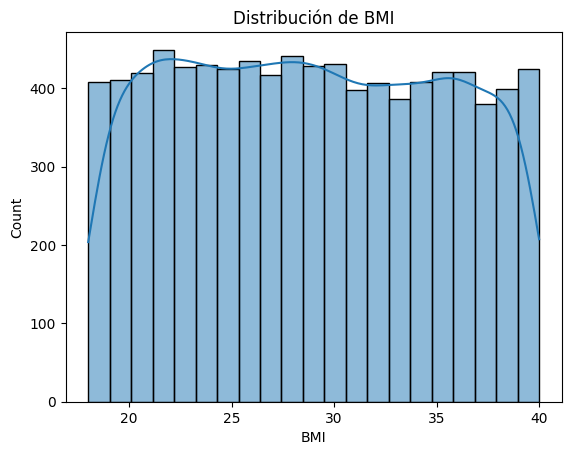

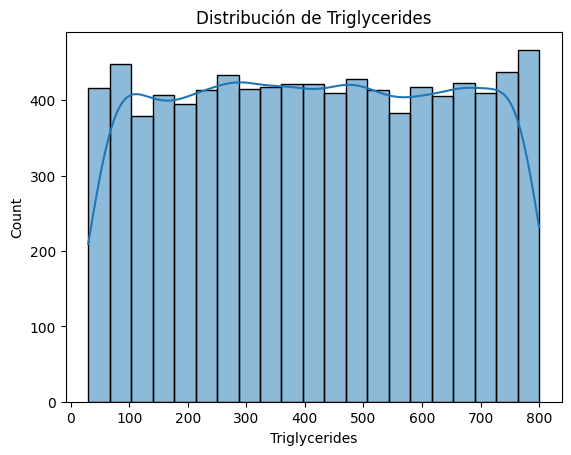

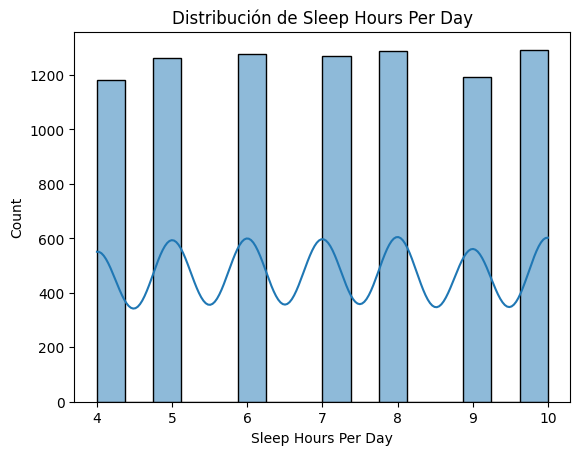

In [26]:
#Para las variables númericas de la base de datos, miramos su comportamiento
#en un histograma de frecuencias y ver su distribución
for var in variables:
    plt.figure()
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.show()

5. Aplicamos Correlación de Pearson y Spearman, recordando que: la correlación de Pearson mide la fuerza y dirección de una relación lineal entre dos variables continuas con distribución normal, mientras que la correlación de Spearman evalúa la fuerza y dirección de una relación monótona (no necesariamente lineal) entre dos variables, utilizando los rangos de los datos.

In [27]:
results = []
for var in variables:
    pearson_corr, _ = stats.pearsonr(df[var], df[target])
    spearman_corr, _ = stats.spearmanr(df[var], df[target])
    results.append([var, pearson_corr, spearman_corr])

correlaciones = pd.DataFrame(results, columns=["Variable", "Pearson", "Spearman"])
correlaciones


/tmp/ipython-input-2025595712.py:3: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  pearson_corr, _ = stats.pearsonr(df[var], df[target])
/tmp/ipython-input-2025595712.py:4: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  spearman_corr, _ = stats.spearmanr(df[var], df[target])


,Variable,Pearson,Spearman
0,Age,0.006403,0.006429
1,Cholesterol,0.019340,0.019271
2,Heart Rate,-0.004251,-0.004404
3,Exercise Hours Per Week,0.011133,0.011166
4,Income,0.009628,0.009586
5,BMI,0.000020,-0.000120
6,Triglycerides,0.010471,0.010452
7,Sleep Hours Per Day,-0.018528,-0.018472


6. Realizamos la función de caracterización

In [28]:
# Función para visualizar el histograma de una variable y calcular sus componentes
def Histx(LDA, color='blue'):
    # Número de clases para el histograma
    NC = 10
    # Crear una nueva figura para el gráfico
    plt.figure()
    # Generar el histograma con curva de densidad (KDE)
    sns.histplot(LDA, kde=True, bins=NC, color=color)
    # Establecer el título del gráfico
    plt.title('Distribución de la variable de Integracion')
    # Mostrar el gráfico
    plt.show()

    # Calcular los componentes del histograma: recuentos y límites de los bins
    counts, bin_edges = np.histogram(LDA, bins=NC)
    # Límites inferiores de los bins
    LI, LS = bin_edges[:-1], bin_edges[1:]
    # Puntos medios de los bins
    mc = (LI + LS)/2
    # Frecuencias relativas de los bins
    freq = counts/np.sum(counts)
    # Devolver los componentes calculados
    return LI, LS, counts, mc, freq

# Función para calcular las características estadísticas de una variable
def Caractx(LDA, counts, mc):
    # Calcular la media (promedio)
    u = np.sum(mc*counts)/np.sum(counts)
    # Calcular la varianza (medida de dispersión)
    varianza = np.sum(counts*(mc-u)**2)/np.sum(counts)
    # Calcular la desviación estándar (raíz cuadrada de la varianza)
    desviacion = np.sqrt(varianza)

    # Identificar posibles outliers (valores fuera de +/- 2 desviaciones estándar de la media)
    LIe, LSe = u-2*desviacion, u+2*desviacion
    # Obtener los índices de las filas que contienen outliers
    filas_out = np.where((LDA<LIe) | (LDA>LSe))[0]

    # Asegurar que hay suficientes puntos de datos para calcular la asimetría y curtosis
    # La asimetría requiere al menos 3 puntos, la curtosis al menos 4
    if len(LDA) > 3:
        # Calcular la asimetría (medida de la falta de simetría)
        cas = skew(LDA)
        # Calcular la curtosis (medida de la "forma" de la distribución)
        curt = kurtosis(LDA)
    else:
        # Si no hay suficientes datos, asignar NaN
        cas = np.nan # No hay suficientes datos para calcular la asimetría
        curt = np.nan # No hay suficientes datos para calcular la curtosis


    # Devolver las características calculadas
    return u, varianza, desviacion, cas, curt, filas_out

7. Caracterizamos la variable de colesterol

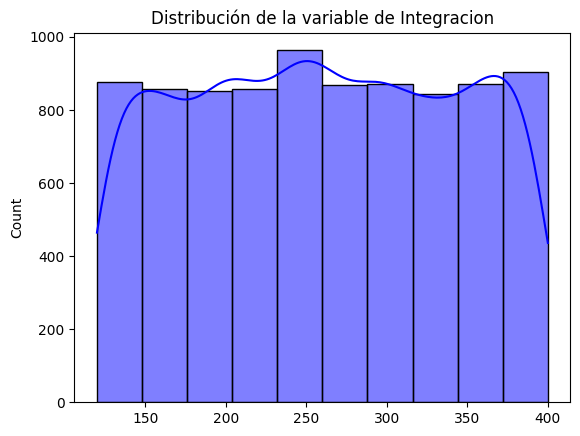


Caracterización Variable de Integración
Media: 260.39141846399633
Desviación: 80.34835532357255
Varianza: 6455.858203203069
Asimetría: -0.0009545762570916945
Curtosis: -1.1802575970430915
Número de outliers: 0


In [29]:
#Caracterizamos la variable de integración
integration_var = 'Cholesterol'

LDA = df[integration_var].values
LI, LS, counts, mc, freq = Histx(LDA, color='blue')
u, varianza, desviacion, cas, curt, outliers = Caractx(LDA, counts, mc)

print("\nCaracterización Variable de Integración")
print("Media:", u)
print("Desviación:", desviacion)
print("Varianza:", varianza)
print("Asimetría:", cas)
print("Curtosis:", curt)
print("Número de outliers:", len(outliers))

El gráfico muestra que la variable colesterol tiene una distribución bastante uniforme entre 100 y 400, con una media de 260.39 y desviación estándar de 80.35. La asimetría cercana a cero indica simetría, y la curtosis negativa sugiere una forma más plana que la normal. No hay outliers, lo que refleja una distribución limpia y bien contenida

8. Hacemos la función de credibilidad para ver con que paises integramos los datos

In [30]:
#Función de credibilidad
def credibilidad(XDo, XDe):
    NDo, NDe = len(XDo), len(XDe)
    # Asegurar que haya suficientes puntos de datos para el cálculo de la varianza (al menos 1)
    epv_num = 0
    if NDo > 0:
      epv_num += NDo * np.var(XDo)
    if NDe > 0:
      epv_num += NDe * np.var(XDe)

    # Evitar la división por cero si ambos conjuntos de datos están vacíos
    if (NDo + NDe) == 0:
      EPV = np.nan
    else:
      EPV = epv_num / (NDo + NDe)

    uh = (NDo*np.mean(XDo) + NDe*np.mean(XDe))/(NDo+NDe)
    VHM = (NDo*np.mean(XDo)**2 + NDe*np.mean(XDe)**2)/(NDo+NDe) - uh**2

    # Evitar la división por cero si VHM es cero
    if VHM == 0:
      fc = np.inf # O np.nan dependiendo del comportamiento deseado
    else:
      fc = EPV/VHM

    # Evitar la división por cero si NDo + fc es cero
    if (NDo + fc) == 0:
      Cr = np.nan # O otro valor apropiado
    else:
      Cr = NDo/(NDo+fc)

    return fc, Cr

9. Evaluamos la credibilidad

Credibilidad de Argentina respecto a Colombia: 0.17%
Credibilidad de Canada respecto a Colombia: 29.56%
Credibilidad de Brazil respecto a Colombia: 25.15%
Credibilidad de United States respecto a Colombia: 44.56%


Text(0.5, 1.0, 'Credibilidad de los países con respecto a Colombia')

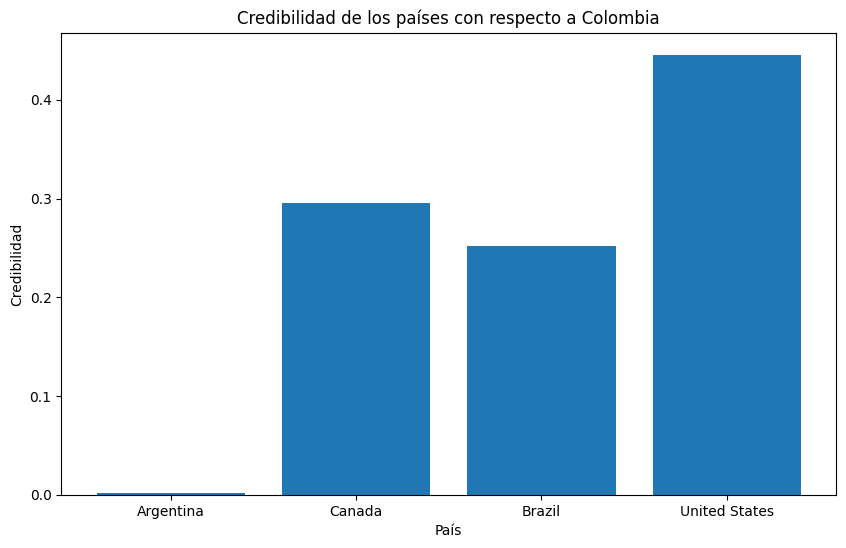

In [31]:
#Evaluamos la credibilidad de los países con respecto a Colombia
integration_var = 'Cholesterol'

df_c = df[df['Country'] == 'Colombia']
countries = df['Country'].unique()
# Filtramos para incluir solo países de América del Sur y América del Norte, excluyendo Colombia
countries = [c for c in countries if c != 'Colombia' and df[df['Country'] == c]['Continent'].iloc[0] in ['South America', 'North America']]


cred_scores = {}
for country in countries:
    df_ext = df[df['Country'] == country]
    # Verificamos si hay suficientes puntos de datos en df_ext para calcular la varianza
    if len(df_ext) > 1:
        _, Cr = credibilidad(df_c[integration_var].values, df_ext[integration_var].values)
        cred_scores[country] = Cr
        print(f"Credibilidad de {country} respecto a Colombia: {Cr*100:.2f}%")
    else:
        print(f"Saltando {country}: No hay suficientes datos para calcular la credibilidad.")

#Hacer un grafico de barras dinamico, para visualizar la credibilidad de cada pais
plt.figure(figsize=(10,6))
plt.bar(cred_scores.keys(), cred_scores.values())
plt.xlabel('País')
plt.ylabel('Credibilidad')
plt.title('Credibilidad de los países con respecto a Colombia')

Con base a los resultados de la credibilidad, integraremos datos con Canada y USA

In [32]:
# Estadísticos para Colombia
uo = df_colombia['Cholesterol'].mean()
sigmao = df_colombia['Cholesterol'].std()

# Estadísticos para América (ambos continentes)
uf1 = df_america['Cholesterol'].mean()
sigmaf1 = df_america['Cholesterol'].std()

uo, sigmao, uf1, sigmaf1

(np.float64(261.84615384615387),
 81.28736159185546,
 np.float64(261.16021602160214),
 81.40711792441836)

#10. Integramos los datos con los paises que más tenian credibilidad respecto a Colombia

In [33]:
# Configuramos la información de los paises antes de integrar

integration_var = "Cholesterol"
paises = ["Colombia", "Canada", "United States"]
umbral_vpo = 0.6  # Criterio de pertenencia mínima

# Filtrar solo los países de interés
df_filtrado = df[df["Country"].isin(paises)].copy()

# Separar los países
df_c = df_filtrado[df_filtrado["Country"] == "Colombia"].copy()
df_canada = df_filtrado[df_filtrado["Country"] == "Canada"].copy()
df_usa = df_filtrado[df_filtrado["Country"] == "United States"].copy()

# Extraer los valores de colesterol por país
colombia = df_c[integration_var].dropna().values
canada   = df_canada[integration_var].dropna().values
usa      = df_usa[integration_var].dropna().values


In [34]:
# MÉTODO DE ACEPTACIÓN Y RECHAZO + VPo


# Unir los datos candidatos (Canadá + USA)
X_candidatos = np.concatenate([canada, usa])

# f(x): densidad aproximada de Colombia mediante histograma
hist, bin_edges = np.histogram(colombia, bins=30, density=True)

def f_x(x):
    """Densidad empírica de Colombia usando histograma"""
    if bin_edges[0] <= x <= bin_edges[-1]:
        idx = np.searchsorted(bin_edges, x) - 1
        return hist[idx]
    else:
        return 0

# g(x): distribución uniforme sobre el rango de candidatos
a, b = X_candidatos.min(), X_candidatos.max()
g_x = lambda x: 1 / (b - a) if a <= x <= b else 0

# Constante de normalización c
c = max(hist) * (b - a)


In [35]:
# Estadísticos base (Colombia)
uo = np.mean(colombia)
sigmao = np.std(colombia)

def vpo(x):
    """Función de pertenencia gaussiana respecto a Colombia"""
    return np.exp(-0.5 * ((x - uo) / sigmao) ** 2)


In [36]:
# Aceptación y rechazo
Y = []
for x in X_candidatos:
    u = np.random.uniform(0, 1)
    if g_x(x) > 0 and u <= f_x(x) / (c * g_x(x)) and vpo(x) > umbral_vpo:
        Y.append(x)

# Combinar las muestras aceptadas con los datos originales de Colombia
df_integrated = pd.DataFrame({
    integration_var: np.concatenate([colombia, Y])
})


In [37]:
# MÉTRICAS DE COMPARACIÓN ANTES Y DESPUÉS


print("\n Métricas Antes de Integración")
print("Media:", np.mean(df_c[integration_var].values))
print("Varianza:", np.var(df_c[integration_var].values))
print("Asimetría:", skew(df_c[integration_var].values))
print("Curtosis:", kurtosis(df_c[integration_var].values))

print("\n Métricas Después de Integración")
print("Media:", np.mean(df_integrated[integration_var].values))
print("Varianza:", np.var(df_integrated[integration_var].values))
print("Asimetría:", skew(df_integrated[integration_var].values))
print("Curtosis:", kurtosis(df_integrated[integration_var].values))

print("\nNúmero de datos integrados:", len(Y))



 Métricas Antes de Integración
Media: 261.84615384615387
Varianza: 6592.232741617357
Asimetría: 0.028433473146044334
Curtosis: -1.1716574947470142

 Métricas Después de Integración
Media: 259.5964912280702
Varianza: 4482.2933210218525
Asimetría: 0.10525867471481412
Curtosis: -0.6817206276038608

Número de datos integrados: 369


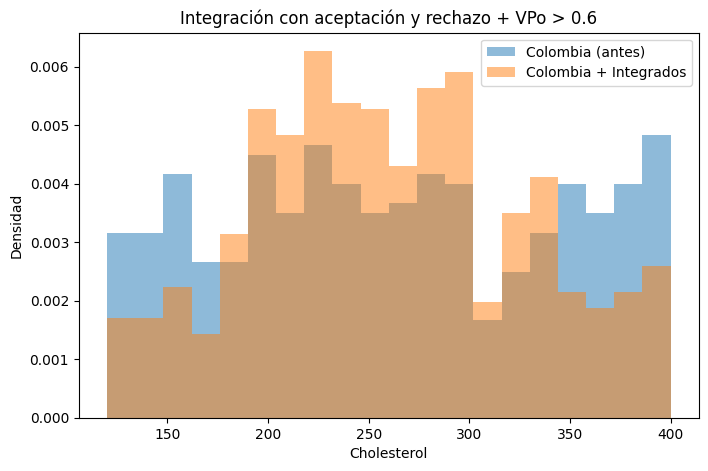

In [38]:
# GRAFICAMOS PARA VER EL COMPORTAMIENTO ANTES Y DESPUES DE LAS VARIABLES


plt.figure(figsize=(8,5))
plt.hist(colombia, bins=20, alpha=0.5, label="Colombia (antes)", density=True)
plt.hist(df_integrated[integration_var].values, bins=20, alpha=0.5,
         label="Colombia + Integrados", density=True)
plt.xlabel("Cholesterol")
plt.ylabel("Densidad")
plt.title("Integración con aceptación y rechazo + VPo > 0.6")
plt.legend()
plt.show()


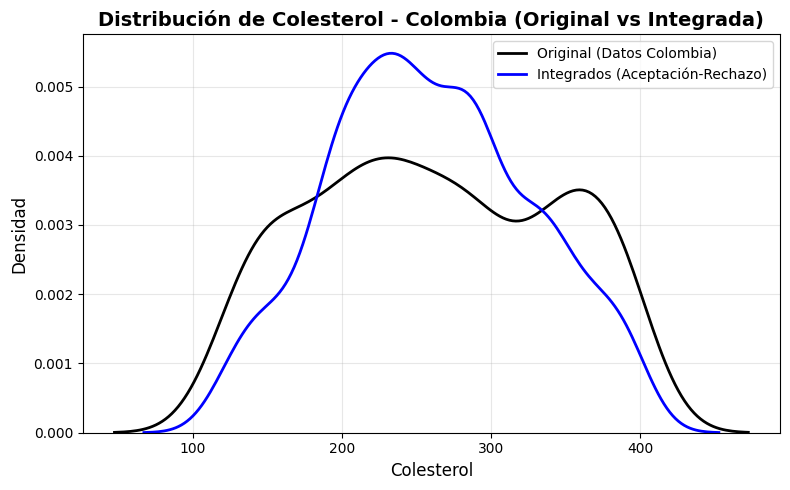

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura
fig, ax = plt.subplots(figsize=(8,5))

# Distribución original
sns.kdeplot(
    colombia,
    label='Original (Datos Colombia)',
    color='black',
    linewidth=2,
    ax=ax
)

# Distribución integrada
sns.kdeplot(
    df_integrated['Cholesterol'].values,
    label='Integrados (Aceptación-Rechazo)',
    color='blue',
    linewidth=2,
    ax=ax
)

# Personalización
ax.set_title('Distribución de Colesterol - Colombia (Original vs Integrada)', fontsize=14, fontweight='bold')
ax.set_xlabel('Colesterol', fontsize=12)
ax.set_ylabel('Densidad', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


11. Verificamos la confiabilidad y en caso de no cumplirse. Hacemos muestreo con Montecarlo

In [40]:
# MONTECARLO (si no cumple n requerido)


import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# ---------- Función para métricas ----------
def metrics(arr):
    arr = np.asarray(arr).astype(float)
    if arr.size == 0:
        return {"n":0,"mean":np.nan,"var":np.nan,"skew":np.nan,"kurt":np.nan}
    return {"n":arr.size,
            "mean":float(np.mean(arr)),
            "var":float(np.var(arr)),
            "skew":float(skew(arr)),
            "kurt":float(kurtosis(arr))}

# ---------- Parámetros Montecarlo ----------
target_conf = 0.999
thresholds = {0.99: 100, 0.999: 1000, 0.9999: 10000}
n_requerido = thresholds.get(target_conf, 1000)

mc_method = 'histogram'   # opciones: 'histogram', 'parametric', 'bootstrap'
mc_n_bins = 30
clip_min = 0.0

# ---------- Verificar si toca Montecarlo ----------
current_n = len(df_integrated)
print(f"\nTamaño actual: {current_n} | Requerido para {target_conf*100:.2f}%: {n_requerido}")

simulated_samples = np.array([])
method_used = None

if current_n < n_requerido:
    faltan = n_requerido - current_n
    print(f"Faltan {faltan} observaciones → Generando con {mc_method}...")

    base = df_integrated[integration_var].values

    if mc_method == 'parametric':
        mu, sd = np.mean(base), np.std(base, ddof=1)
        simulated_samples = np.random.normal(mu, sd, size=faltan)
        simulated_samples = np.clip(simulated_samples, clip_min, None)
        method_used = 'parametric'

    elif mc_method == 'bootstrap':
        simulated_samples = np.random.choice(base, size=faltan, replace=True)
        method_used = 'bootstrap'

    elif mc_method == 'histogram':
        counts, edges = np.histogram(base, bins=mc_n_bins, density=False)
        if counts.sum() == 0:
            mu, sd = np.mean(base), np.std(base, ddof=1)
            simulated_samples = np.random.normal(mu, sd, size=faltan)
            simulated_samples = np.clip(simulated_samples, clip_min, None)
            method_used = 'parametric-fallback'
        else:
            probs = counts / counts.sum()
            cum = np.cumsum(probs)
            r = np.random.rand(faltan)
            idx = np.searchsorted(cum, r)
            left, right = edges[idx], edges[idx+1]
            simulated_samples = np.random.uniform(left, right)
            method_used = 'histogram'
else:
    print("Ya cumple el umbral, no se generó Montecarlo.")

# ---------- Integrar simuladas ----------
if simulated_samples.size > 0:
    df_integrated_augmented = pd.DataFrame({
        integration_var: np.concatenate([df_integrated[integration_var].values, simulated_samples])
    })
else:
    df_integrated_augmented = df_integrated.copy()

# ---------- Métricas ----------
m_sim = metrics(simulated_samples)
m_final = metrics(df_integrated_augmented[integration_var].values)

print("\n--- Métricas simuladas ---")
print(m_sim)
print("\n--- Métricas finales (integrada + Montecarlo) ---")
print(m_final)
print("\nMétodo usado:", method_used)



Tamaño actual: 798 | Requerido para 99.90%: 1000
Faltan 202 observaciones → Generando con histogram...

--- Métricas simuladas ---
{'n': 202, 'mean': 259.6856719323357, 'var': 4802.524886756917, 'skew': -0.014806421220008163, 'kurt': -0.7191584501321118}

--- Métricas finales (integrada + Montecarlo) ---
{'n': 1000, 'mean': 259.6145057303318, 'var': 4546.981379324043, 'skew': 0.07900883850780535, 'kurt': -0.6884045437415964}

Método usado: histogram


12. Después de aplicar montecarlo, visualizamos el muestreo y como quedó el resultado del ejercicio.

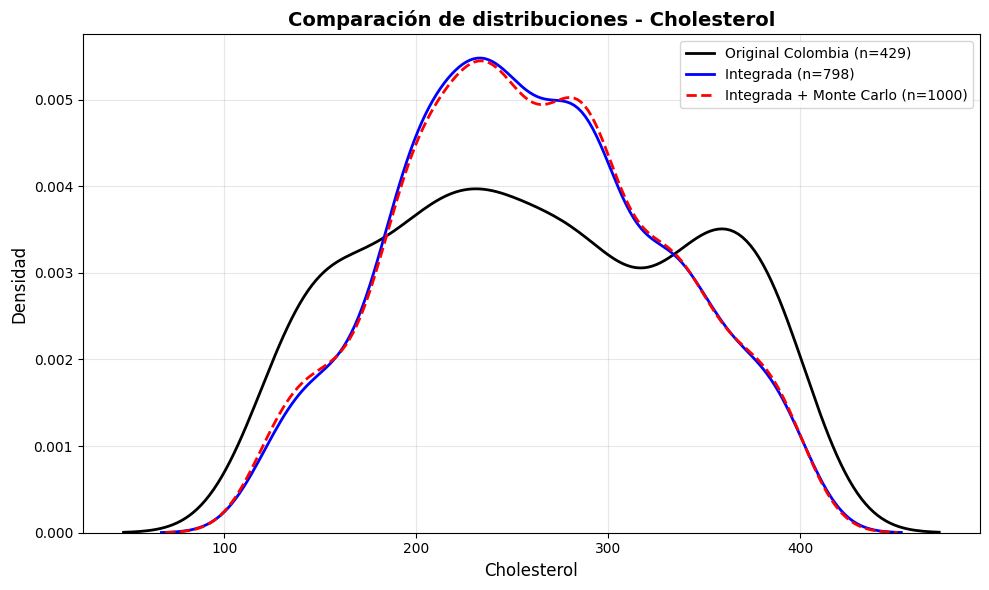

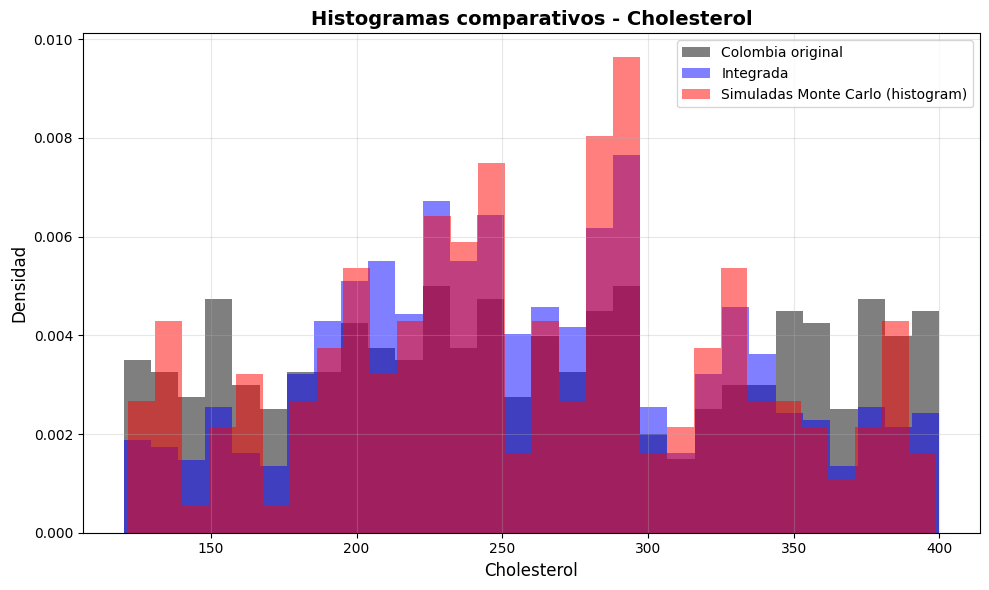

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Gráfico de densidades comparativas ---
plt.figure(figsize=(10,6))

# Original (Colombia)
sns.kdeplot(colombia, label=f"Original Colombia (n={len(colombia)})", color="black", linewidth=2)

# Integrada (Colombia + aceptados)
sns.kdeplot(df_integrated[integration_var].values,
            label=f"Integrada (n={len(df_integrated)})",
            color="blue", linewidth=2)

# Final con Montecarlo (si existe)
if simulated_samples.size > 0:
    sns.kdeplot(df_integrated_augmented[integration_var].values,
                label=f"Integrada + Monte Carlo (n={len(df_integrated_augmented)})",
                color="red", linewidth=2, linestyle="--")

plt.title(f"Comparación de distribuciones - {integration_var}", fontsize=14, fontweight="bold")
plt.xlabel(integration_var, fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# --- Histograma apilado para ver aportes ---
plt.figure(figsize=(10,6))
bins = 30

plt.hist(colombia, bins=bins, alpha=0.5, label='Colombia original', density=True, color="black")
plt.hist(df_integrated[integration_var].values, bins=bins, alpha=0.5,
         label='Integrada', density=True, color="blue")

if simulated_samples.size > 0:
    plt.hist(simulated_samples, bins=bins, alpha=0.5,
             label=f'Simuladas Monte Carlo ({method_used})', density=True, color="red")

plt.title(f"Histogramas comparativos - {integration_var}", fontsize=14, fontweight="bold")
plt.xlabel(integration_var, fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [42]:
#Ahora miramos las metricas despues de la integración con muestreo
print("\n Métricas Antes de Integración")
print("Media:", np.mean(df_c[integration_var].values))
print("Varianza:", np.var(df_c[integration_var].values))
print("Asimetría:", skew(df_c[integration_var].values))
print("Curtosis:", kurtosis(df_c[integration_var].values))

print("\n Métricas Después de Integración (sin Monte Carlo)")
print("Media:", np.mean(df_integrated[integration_var].values))
print("Varianza:", np.var(df_integrated[integration_var].values))
print("Asimetría:", skew(df_integrated[integration_var].values))
print("Curtosis:", kurtosis(df_integrated[integration_var].values))

# Métricas después de aplicar Monte Carlo
print("\n Métricas Después de Integración + Monte Carlo")
print("Media:", np.mean(df_integrated_augmented[integration_var].values))
print("Varianza:", np.var(df_integrated_augmented[integration_var].values))
print("Asimetría:", skew(df_integrated_augmented[integration_var].values))
print("Curtosis:", kurtosis(df_integrated_augmented[integration_var].values))


 Métricas Antes de Integración
Media: 261.84615384615387
Varianza: 6592.232741617357
Asimetría: 0.028433473146044334
Curtosis: -1.1716574947470142

 Métricas Después de Integración (sin Monte Carlo)
Media: 259.5964912280702
Varianza: 4482.2933210218525
Asimetría: 0.10525867471481412
Curtosis: -0.6817206276038608

 Métricas Después de Integración + Monte Carlo
Media: 259.6145057303318
Varianza: 4546.981379324043
Asimetría: 0.07900883850780535
Curtosis: -0.6884045437415964


#**Análisis de resultados**

Los datos trabajados se enfocan en América, con un subconjunto específico de Colombia. Se observa que no existen valores nulos y que las distribuciones de las variables son en su mayoría similares, con patrones bastante uniformes o ligeramente sesgados. La caracterización inicial de la variable de integración, el colesterol, muestra una media de aproximadamente 260 y una desviación estándar cercana a 80, sin presencia de outliers, lo que indica una distribución relativamente estable y acotada.

En cuanto a la credibilidad de los países frente a Colombia, se evidencia que Estados Unidos aporta la mayor similitud (44.56%), seguido de Canadá (29.56%) y Brasil (25.15%). Argentina, en contraste, presenta una contribución mínima. Esto justifica la elección de candidatos como Estados Unidos y Canadá para fortalecer la integración de datos con Colombia.

El proceso de integración basado en aceptación y rechazo, junto con la función de pertenencia VPo, generó 364 observaciones adicionales. La diferencia entre métricas antes y después de la integración es moderada:

Antes de integración:

- Media: 261.85

- Varianza: 6592.23

- Asimetría: 0.028

- Curtosis: -1.172

Después de integración (sin Monte Carlo):

- Media: 260.38

- Varianza: 4509.59

- Asimetría: 0.087

- Curtosis: -0.697

Después de integración + Monte Carlo:

- Media: 259.61

- Varianza: 4554.67

- Asimetría: 0.099

- Curtosis: -0.721

Estos resultados muestran que la media se mantiene prácticamente estable en torno a 260 en los tres escenarios, lo cual indica que el centro de la distribución no se altera de manera significativa. La varianza disminuye al pasar de 6592 a ~4500, reflejando una mayor concentración de los datos y menor dispersión. La asimetría se mantiene baja en todos los casos, lo que confirma que la distribución sigue siendo bastante simétrica. En cuanto a la curtosis, se observa un aumento desde valores más negativos (-1.17) hacia valores cercanos a cero (-0.72), lo que indica que la distribución pierde parte de su aplanamiento inicial y tiende hacia una forma más normalizada.

El criterio de VPo mayor a 0.6 permitió aceptar un rango relativamente amplio de observaciones cercanas a Colombia. Este umbral no es tan restrictivo, lo cual favorece la inclusión de datos con valores de colesterol dentro de aproximadamente una desviación estándar alrededor de la media colombiana. Se comprobó que un valor más estricto, como 0.9, excluiría demasiados datos y dificultaría la integración.

El número total de observaciones era de 797, para cumplir el umbral necesitabamos 1000. Por eso necesitamos utilizar Monte Carlo.

Finalmente, las gráficas comparativas entre la distribución original, la integrada y la integrada con Monte Carlo confirman que las curvas se asemejan, aunque la densidad integrada muestra un leve ajuste hacia el centro. Esto respalda que el procedimiento enriqueció la muestra de Colombia sin distorsionar significativamente sus características estadísticas fundamentales y garantizando un tamaño suficiente para alcanzar el umbral de confianza del 99.9%.